In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline

In [198]:
df = pd.read_csv('creditcard.csv')

In [199]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [200]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [201]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [203]:
df.isnull().sum().max()

0

In [204]:
print('Normal Transactions count:',df['Class'].value_counts().values[0])
print('Fraudulent Transactions count:',df['Class'].value_counts().values[1])

Normal Transactions count: 284315
Fraudulent Transactions count: 492


In [205]:
print('Normal transactions are',(df['Class'].value_counts().values[0]/df.shape[0])*100,'% of the dataset')
print('Fraudulent transactions are',(df['Class'].value_counts().values[1]/df.shape[0])*100,'% of the dataset')

Normal transactions are 99.82725143693798 % of the dataset
Fraudulent transactions are 0.1727485630620034 % of the dataset


Text(0, 0.5, 'Frequency')

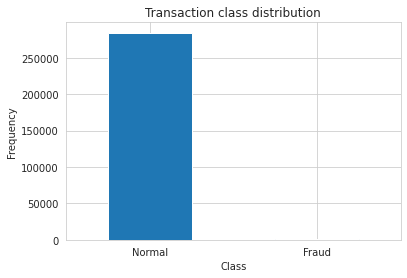

In [206]:
count_class=pd.value_counts(df['Class'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title('Transaction class distribution')
LABELS=['Normal','Fraud']
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

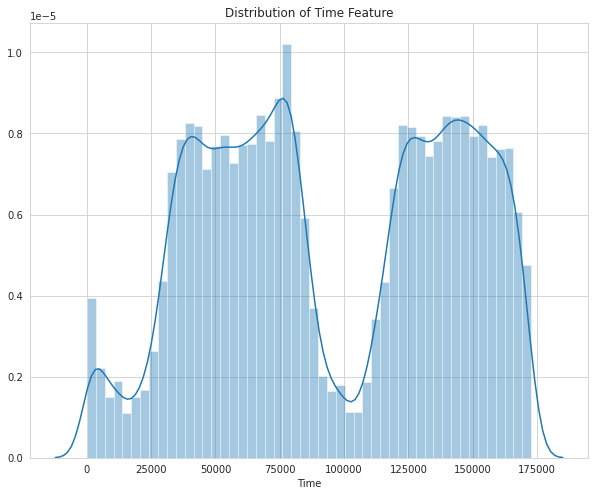

In [207]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

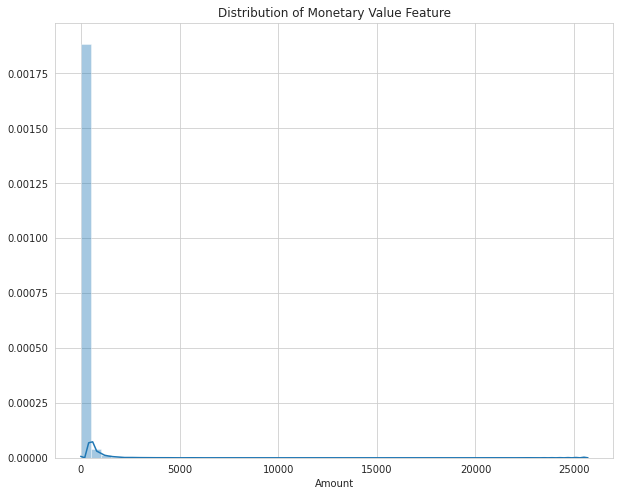

In [208]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [211]:
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

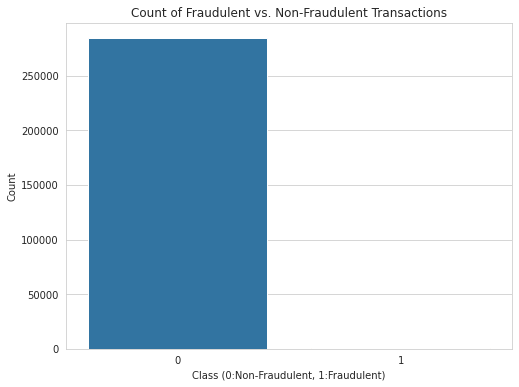

In [212]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [213]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

Text(0.5, 1.0, 'Heatmap of Correlation')

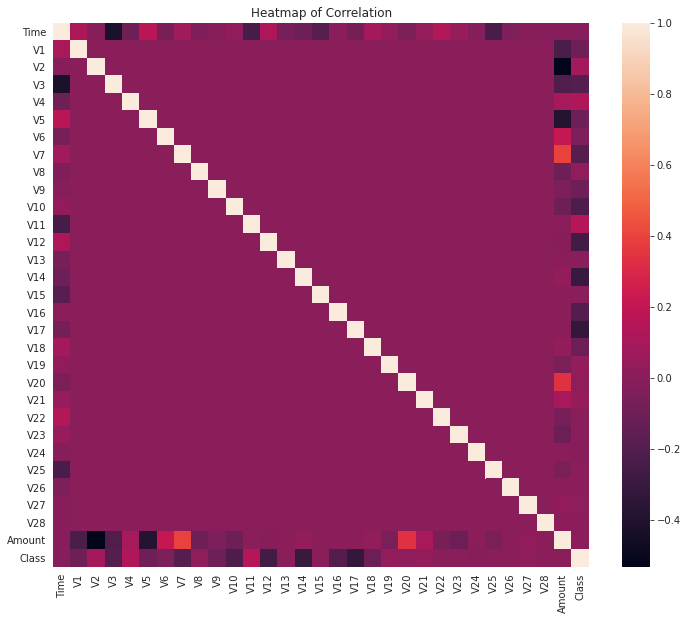

In [214]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [215]:
from sklearn.preprocessing import StandardScaler

In [216]:
scaler = StandardScaler()
scaler2 = StandardScaler()

In [217]:
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [218]:
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [219]:
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
73130,54993.0,-2.718553,2.480586,-0.243196,-0.133544,-1.348264,-0.839848,-0.816842,1.739740,-0.768119,-0.017865,0.891185,1.631186,0.809578,1.232762,-0.008329,0.794785,-0.043186,0.163291,0.201103,0.029898,-0.092432,-0.544542,0.231365,0.315202,0.043871,0.064721,-0.027982,0.022012,9.99,0,-0.313289,-0.838545
147196,88234.0,-2.144573,-1.370483,-0.228927,3.462981,3.049371,-1.027189,0.753903,-0.135628,-1.566855,1.087910,-1.583614,-0.664940,0.000031,0.153875,-1.349161,0.579557,-0.871739,-0.181196,-1.436056,-0.639404,0.147250,1.144456,1.972490,0.633085,0.809352,0.277732,0.185427,-0.275699,12.11,0,-0.304813,-0.138558
223872,143561.0,1.839708,-0.639102,-0.085502,0.323370,-0.787610,0.088847,-0.833075,0.179862,1.265362,-0.042715,0.611179,1.212664,0.380447,-0.091764,0.213175,0.620114,-0.979710,0.706562,0.032187,-0.088094,0.115791,0.401596,0.188117,-0.401481,-0.402982,-0.432474,0.047219,-0.031410,55.90,0,-0.129736,1.026514
69642,53514.0,-2.698956,-2.316915,1.495452,-1.074116,0.671197,-2.033674,-1.457096,0.627868,-1.578687,-0.091657,1.256413,0.226500,0.120468,0.321643,-0.377109,1.741286,-0.035026,-0.775980,0.150907,0.765217,0.431200,-0.075650,0.019516,0.526186,-0.183963,-0.620289,-0.008283,-0.359702,39.99,0,-0.193346,-0.869689
279613,168988.0,1.998905,-0.187552,-1.583993,0.544693,0.063713,-1.052237,0.297090,-0.187470,0.377351,0.345433,0.592685,0.064939,-2.153306,1.016510,-0.909479,-0.375558,-0.146607,-0.188663,0.335969,-0.345225,0.020138,0.126445,0.086423,0.017424,0.092179,0.365146,-0.098200,-0.085894,16.76,0,-0.286221,1.561953


In [220]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [221]:
cc = np.random.rand(len(df)) < 0.9
train = df[cc]
test = df[~cc]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256273, 31)
Test Shape: (28534, 31)


In [222]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [223]:
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 438 fraudulent transactions in the train data.


In [224]:
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [225]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
249309,2.203615,-0.700790,-1.245357,-1.103934,-0.386484,-0.635845,-0.563543,-0.164890,-0.782496,1.017889,1.168057,0.259667,0.518189,0.078914,-0.289655,1.190642,-0.176818,-0.846190,0.715740,0.007385,0.397904,1.125022,0.097728,0.815889,0.065264,-0.093190,-0.034497,-0.064641,0,-0.347952,1.529777
126627,-0.675359,0.695567,2.256677,0.226850,0.527275,-0.131499,0.602556,-0.078274,-1.016374,-0.113990,2.031283,1.153128,0.910248,0.068502,0.750536,-0.361284,-0.159233,-0.418448,0.628997,0.252221,-0.128879,-0.269157,-0.117053,0.246762,-0.079110,0.196149,-0.124496,-0.154291,0,-0.345313,-0.228728
232373,0.681941,-2.434378,-0.653217,1.054070,-1.873303,-1.059840,0.328927,-0.355069,0.892297,-0.253750,0.059078,0.719258,0.433998,0.062148,0.859433,0.343347,-0.313366,-0.136651,-0.926213,1.140544,0.636841,0.500542,-0.278316,1.025969,-0.700989,0.523466,-0.156307,0.075446,0,2.296302,1.343477
135981,-1.308249,-0.185220,2.495021,-2.439237,-0.332138,0.110493,-0.370599,0.505275,2.498155,-1.781261,1.240198,-2.852567,-0.428229,1.352803,-0.883389,1.195832,-0.449861,1.430683,-1.134946,0.040950,0.079912,0.284944,-0.187684,0.695234,0.386332,0.549724,0.158875,0.108516,0,-0.125418,0.003793
154684,0.137493,-0.176242,0.231725,-0.574860,-0.179493,0.134373,0.434684,-0.066824,-1.480969,0.638680,0.198673,0.648945,1.215228,-0.003492,-0.527349,-1.629235,-0.322497,1.755702,0.400291,-0.140002,-0.117317,0.125366,0.375575,-0.550840,-1.418961,0.206971,0.256928,0.271763,0,0.086360,0.548836


In [226]:
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [227]:
subsample = pd.concat([selected, fraud])
len(subsample)

876

In [228]:
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.504533,0.871360,1.895000,2.121162,0.424541,0.312144,0.547290,0.182844,-0.936445,0.287236,-1.661162,-0.003899,0.978263,-0.646630,-1.511889,1.951276,-1.780403,0.038304,-3.133629,-0.177999,0.223520,0.504171,0.251159,-0.168118,-1.199087,-0.554310,0.229128,0.271897,0,-0.124059,0.721763
1,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,-3.926510,2.757837,-5.437354,0.546879,-8.396573,-0.810716,-3.014294,-6.642482,-2.584028,-0.820354,0.461032,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,1,-0.337637,1.278661
2,-0.067672,4.251181,-6.540388,7.283657,0.513541,-2.635066,-1.865911,0.780272,-3.868248,-4.851487,3.871165,-6.887637,-1.790500,-11.272316,1.301363,-1.689836,-0.052933,0.778735,0.242162,0.519404,0.415437,-0.469938,0.007128,-0.388147,-0.493398,0.466468,0.566370,0.262990,1,-0.350151,1.081643
3,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.350191,1.569513
4,-3.558374,3.126643,0.327601,-0.257186,-0.738715,0.635564,-1.560488,-7.186580,1.204703,1.450168,0.428013,0.058351,-1.304628,-0.447008,1.200852,-0.111605,0.929388,-0.602185,-0.840613,-1.187037,6.382019,-2.888958,1.168259,0.391983,-0.037305,0.072268,0.371008,-0.427160,0,-0.209338,-0.895759
5,2.090019,-0.210110,-1.494534,0.072054,0.310483,-0.332229,-0.016060,-0.058778,0.521915,0.276582,-0.146066,0.192930,-0.966184,0.634611,-0.462531,0.441320,-0.845222,0.096340,0.827450,-0.251939,-0.317415,-0.866548,0.215069,-1.067804,-0.230531,0.245447,-0.083271,-0.082836,0,-0.345313,1.195946
6,-19.179826,11.817922,-21.919174,6.086236,-14.708845,-4.308888,-15.357952,12.857165,-3.999861,-8.928656,5.849293,-8.261650,0.153829,-8.829359,0.008879,-7.070953,-13.629721,-4.958830,1.272091,1.572950,1.746802,-1.353149,-0.762965,0.117028,1.297994,-0.224825,1.621052,0.484614,1,0.046539,-1.437369
7,-22.561699,13.208904,-24.643819,6.232532,-16.905611,-4.497439,-16.810184,14.955107,-3.871297,-8.581266,5.256988,-7.393615,0.538801,-7.577552,-0.030726,-6.454783,-12.845657,-4.865918,1.062442,1.621444,1.765987,-1.635517,-0.998317,0.138972,1.559350,-0.222125,1.504425,0.445920,1,0.046539,-1.429472
8,-1.522305,1.505152,0.372364,2.286869,-0.526519,0.998593,-1.087556,-0.027248,-0.533001,0.169573,2.790396,-2.316952,-0.782532,-3.431738,-0.527702,-3.293558,-3.901499,-2.525440,0.795144,0.412801,0.332216,0.493981,-0.080198,-0.253327,-0.477800,0.991740,-0.952554,-0.390364,1,-0.277106,-0.698446
9,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,-0.283731,0.903117,-0.158826,-1.930709,-2.376654,-1.810172,0.935791,1.591506,1.259471,-0.666806,-0.219461,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,1,-0.350191,-0.881903


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

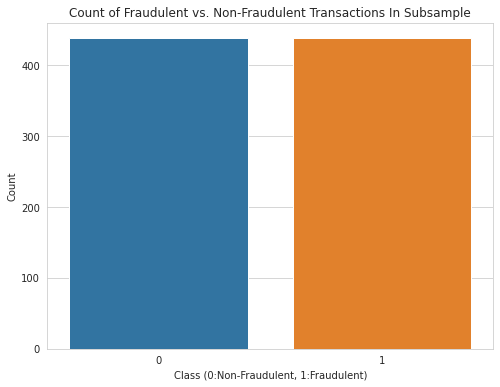

In [229]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [230]:
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.420677
V2,0.487909
V3,-0.564613
V4,0.716411
V5,-0.376179
V6,-0.401695
V7,-0.474239
V8,0.055626
V9,-0.550835
V10,-0.630718


In [231]:
corr[corr.Class < -0.5]

,Class
V3,-0.564613
V9,-0.550835
V10,-0.630718
V12,-0.685131
V14,-0.752465
V16,-0.596421
V17,-0.558511


In [232]:
corr[corr.Class > 0.5]

,Class
V4,0.716411
V11,0.673954
Class,1.000000


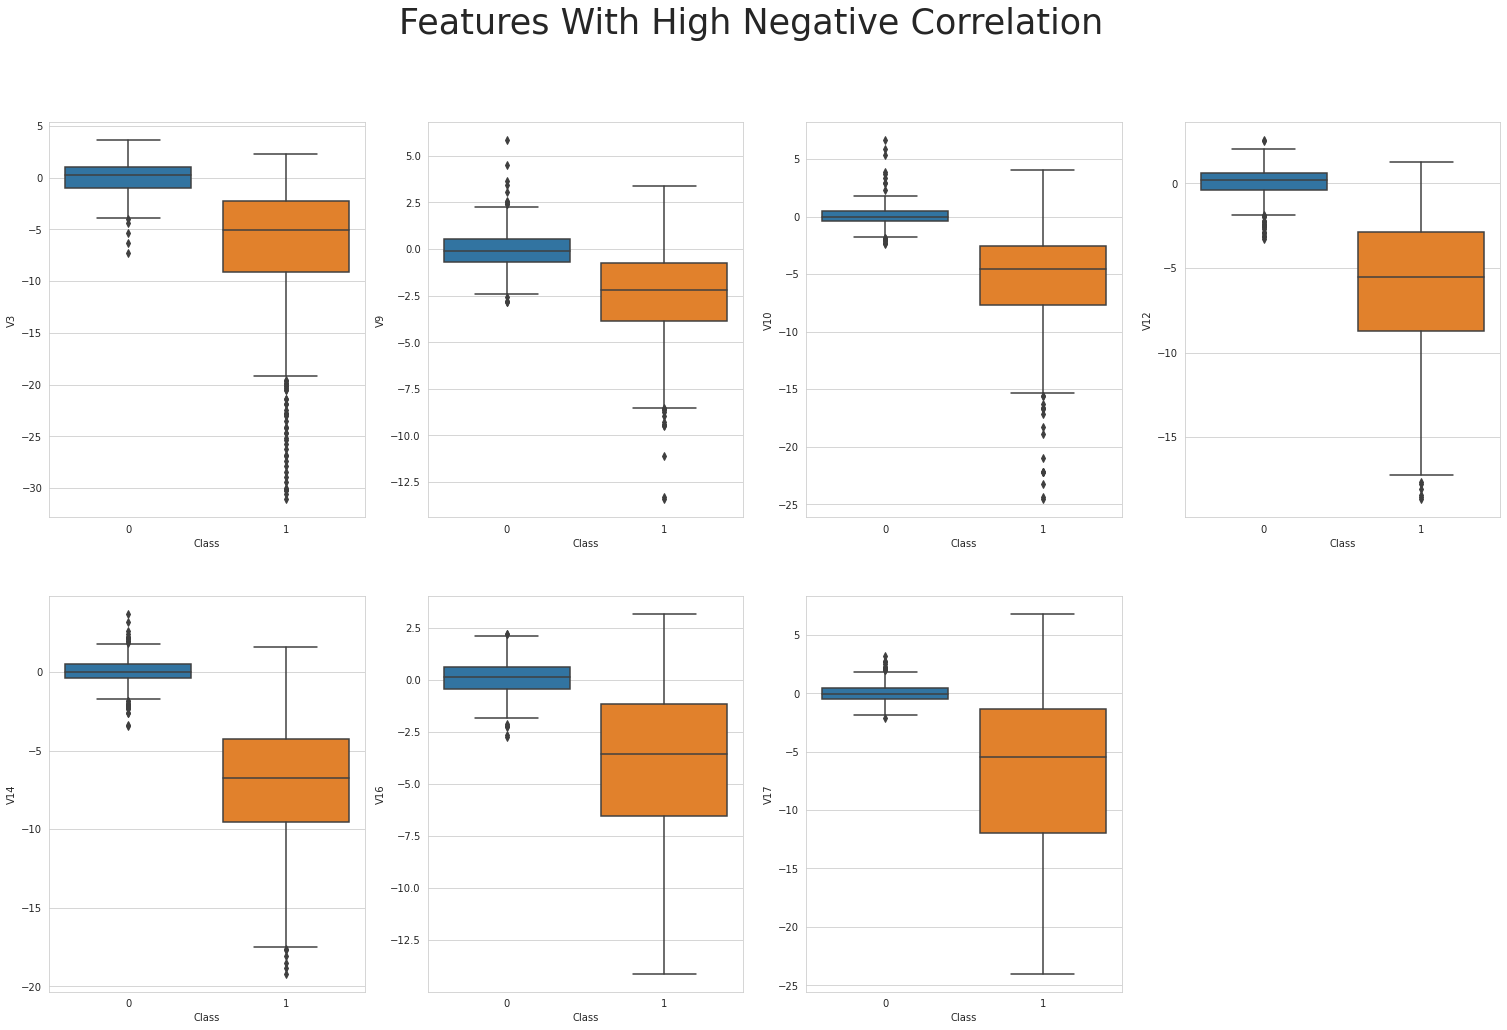

In [233]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

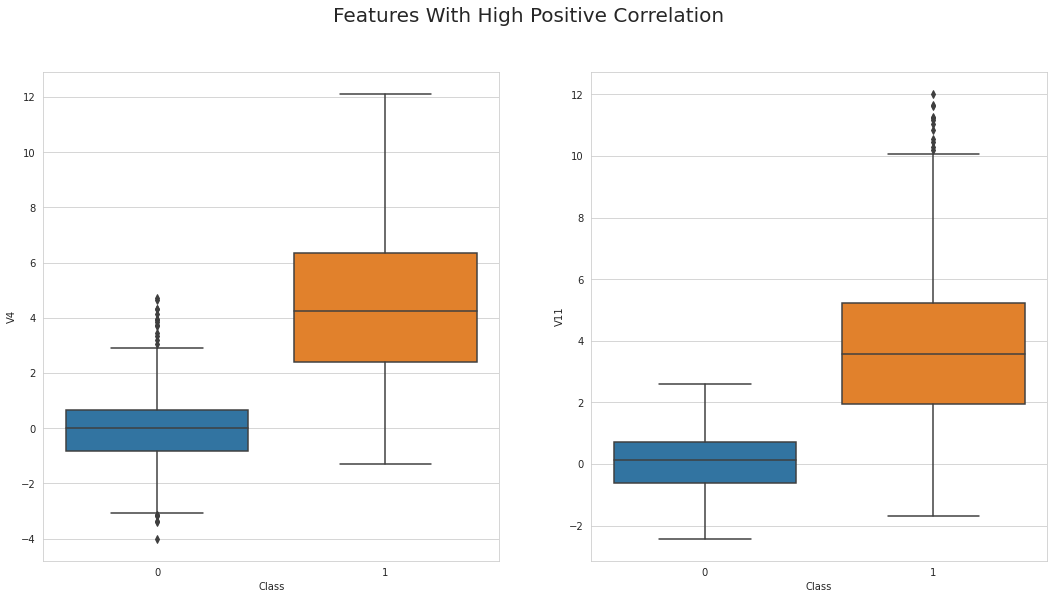

In [234]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])


In [235]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns

data_features = df[feature_names]
data_target = df[target]

In [236]:
feature_names

Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'scaled_amount'],
      dtype='object')

In [237]:
target

Index(['scaled_time'], dtype='object')

In [238]:
from sklearn.model_selection import train_test_split

In [241]:
v14_fraud = subsample['V14'].loc[subsample['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
new_df = subsample.drop(subsample[(subsample['V14'] > v14_upper) | (subsample['V14'] < v14_lower)].index)


v12_fraud = subsample['V12'].loc[subsample['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
new_df = subsample.drop(subsample[(subsample['V12'] > v12_upper) | (subsample['V12'] < v12_lower)].index)



v10_fraud = subsample['V10'].loc[subsample['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

new_df = subsample.drop(subsample[(subsample['V10'] > v10_upper) | (subsample['V10'] < v10_lower)].index)

In [242]:
X=new_df.drop('Class',axis=1) 
y=new_df['Class']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [246]:
predictions = lr.predict(X_test)

In [247]:
from sklearn.metrics import classification_report

In [248]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        87
           1       0.96      0.93      0.95        85

    accuracy                           0.95       172
   macro avg       0.95      0.95      0.95       172
weighted avg       0.95      0.95      0.95       172



In [249]:
from sklearn.metrics import confusion_matrix

In [250]:
print(confusion_matrix(y_test,predictions))

[[84  3]
 [ 6 79]]


In [251]:
from sklearn.metrics import accuracy_score

In [252]:
print(accuracy_score(y_test,predictions))

0.9476744186046512


In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [254]:

#Support Vector Classifier
svc=SVC()
svc.fit(X_train,y_train)
#K-nearest neighbors
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
#Random Forest Classifier
RDF_Classifier=RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train,y_train)
#DecisionTreeClassifier
DecisionTreeClassifier= DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [256]:
models_list=[('Logistic Regression',logmodel),('SVC',svc),('KNeighborsClassifier',knn),('RFC',RDF_Classifier),('DecisionTreeClassifier',DecisionTreeClassifier)]
models=[j for j in models_list]
print()
print('===========================Model Test Results================================')
for i,v in models:
      print('==========================={}=========================================='.format(i))
      pred_test = v.predict(X_test)
      print('Accuracy =',accuracy_score(y_test,pred_test))
      print('Confusion Matrix')
      print(confusion_matrix(y_test,pred_test))
      print('Classification Report')
      print(classification_report(y_test,pred_test))


===========================Model Test Results================================
===========================Logistic Regression==========================================
Accuracy = 0.8313953488372093
Confusion Matrix
[[87  0]
 [29 56]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        87
           1       1.00      0.66      0.79        85

    accuracy                           0.83       172
   macro avg       0.88      0.83      0.83       172
weighted avg       0.87      0.83      0.83       172

===========================SVC==========================================
Accuracy = 0.9418604651162791
Confusion Matrix
[[86  1]
 [ 9 76]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.99      0.89      0.94        85

    accuracy                           0.94       172
   macro avg       0.95      0.94     